In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Beta VAE

[Understanding VAEs](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73)

[What is VAE intuitively](https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf)

### **Architecture**

#### Data preparation

#### Encoder
1. **Convolutional Block**
   1. Convolutional Layer
   2. Batch Normalization Layer
   3. ReLU Activation
2. **Flattening Layer**
3. **Dense Layer** on Flatten
4. **Batch Normalization Layer** -> Mean
5. **Dense Layer** on Flatten
6. **Batch Normalization Layer** -> LogVar

#### Sampler from Normal(Mean, LogVar)

#### Decoder
1. **Dense Layer**
2. **Batch Normalization Layer**
3. **Reshape** normalization output
4. **Deconvolutional Block**
   1. Deconvolutional Layer
   2. Batch Normalization Layer
   3. ReLU Activation
5. **Deconvolutional Layer**
6. **Sigmoid Activation**

#### Loss
1. Reconstruction Loss $\Sigma(y-\hat{y})^2/N/B$ where $N$ is number of pixels and $B$ is the batch size.
2. KL Divergence
3. Total Loss (including KL weight aka beta)

**MNIST data**

In [8]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
print(x_train.shape, x_test.shape)
mnist_digits = np.concatenate([x_train, x_test], axis=0)
print(mnist_digits.shape)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
print(mnist_digits.shape)

(60000, 28, 28) (10000, 28, 28)
(70000, 28, 28)
(70000, 28, 28, 1)


In [9]:
type(x_train)

numpy.ndarray

**Keras example code for VAE to beta-VAE**

In [10]:
from model import *

filters = [32,64]
latent_dim = 2
image_size = (28,28)

In [11]:
encoder = Encoder(filters=filters,latent_dim=latent_dim)
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 14, 14, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
conv_norm_1 (BatchNormalization (None, 14, 14, 32)   128         conv_layer_1[0][0]               
__________________________________________________________________________________________________
conv_relu_1 (ReLU)              (None, 14, 14, 32)   0           conv_norm_1[0][0]                
____________________________________________________________________________________________

In [12]:
decoder = Decoder(latent_dim=latent_dim, filters=filters, last_convdim=7)
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
latent_input (InputLayer)    [(None, 2)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
deconv2d_1 (Conv2DTranspose) (None, 14, 14, 64)        36928     
_________________________________________________________________
deconv_norm_1 (BatchNormaliz (None, 14, 14, 64)        256       
_________________________________________________________________
deconv_relu_1 (ReLU)         (None, 14, 14, 64)        0         
_________________________________________________________________
deconv2d_2 (Conv2DTranspose) (None, 28, 28, 64)        3692

In [ ]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

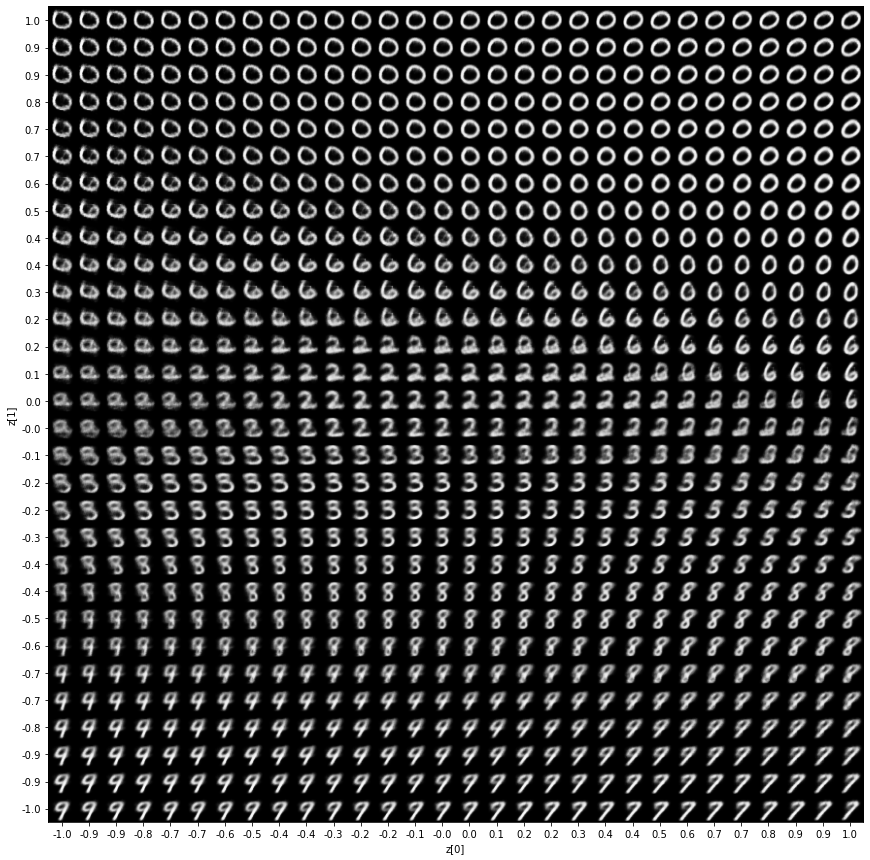

In [ ]:
plot_latent_space(vae)

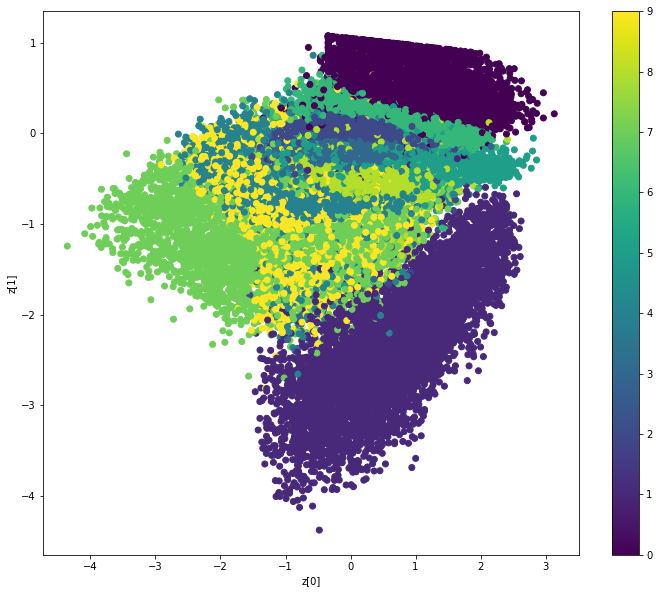

In [ ]:
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

In [ ]:
vae2 = VAE(encoder, decoder, beta=10.)
vae2.compile(optimizer=keras.optimizers.Adam())
vae2.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 198s 359ms/step - Total_loss: 191.7258 - Reconstruction_loss: 153.2469 - KL_loss: 3.8479
Epoch 2/10
547/547 [==============================] - 173s 316ms/step - Total_loss: 189.3890 - Reconstruction_loss: 156.5531 - KL_loss: 3.2836
Epoch 3/10
547/547 [==============================] - 164s 299ms/step - Total_loss: 188.7356 - Reconstruction_loss: 156.9975 - KL_loss: 3.1738
Epoch 4/10
547/547 [==============================] - 162s 296ms/step - Total_loss: 188.4097 - Reconstruction_loss: 157.2215 - KL_loss: 3.1188
Epoch 5/10
547/547 [==============================] - 179s 328ms/step - Total_loss: 188.2242 - Reconstruction_loss: 157.4528 - KL_loss: 3.0771
Epoch 6/10
547/547 [==============================] - 174s 319ms/step - Total_loss: 187.8684 - Reconstruction_loss: 157.4817 - KL_loss: 3.0387
Epoch 7/10
547/547 [==============================] - 164s 300ms/step - Total_loss: 187.6109 - Reconstruction_loss: 157.4506 - KL_loss: 3.0160

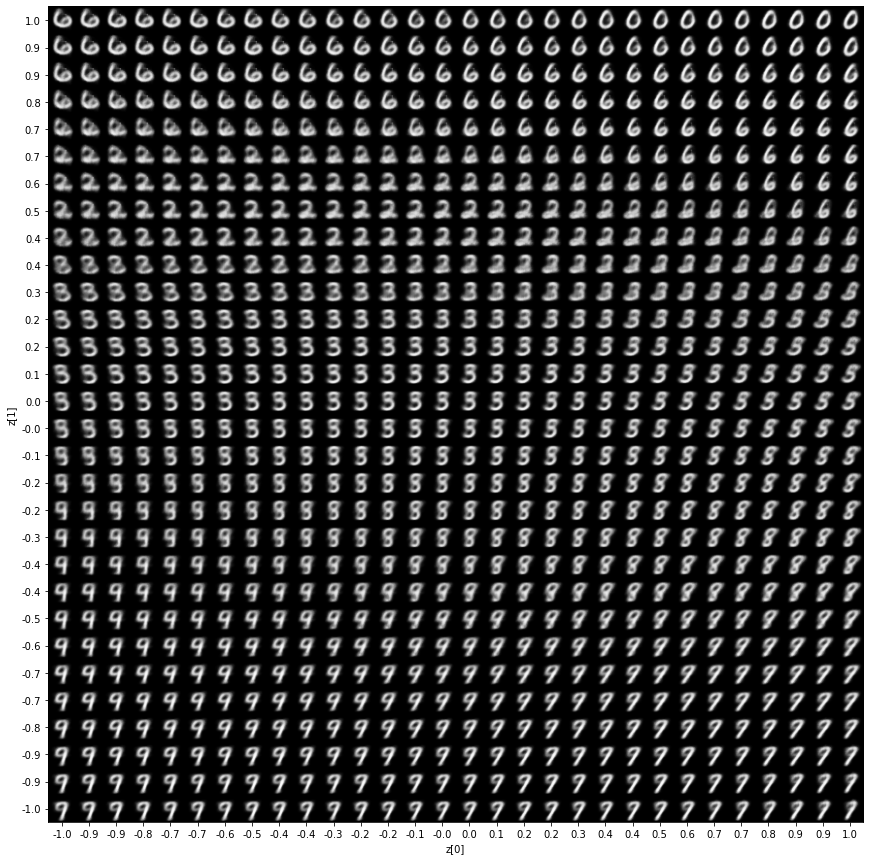

In [ ]:
plot_latent_space(vae2)

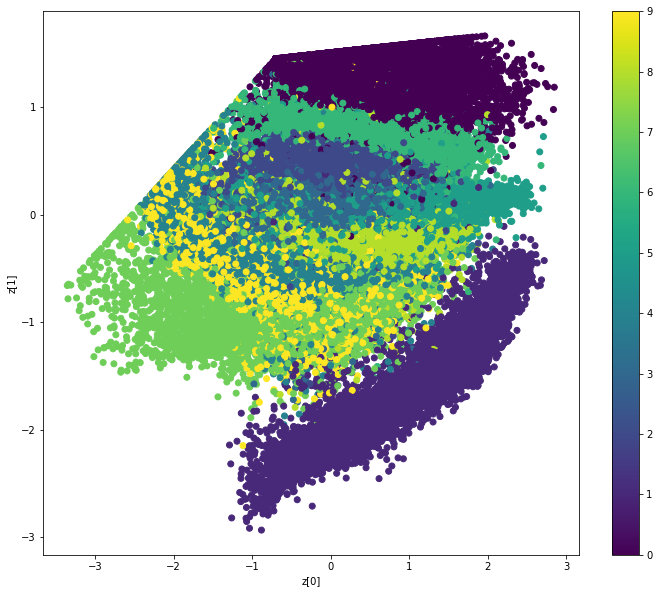

In [ ]:
plot_label_clusters(vae2, x_train, y_train)

In [ ]:
vae3 = VAE(encoder, decoder, beta=0.01)
vae3.compile(optimizer=keras.optimizers.Adam())
vae3.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 265s 482ms/step - Total_loss: 145.9508 - Reconstruction_loss: 145.8886 - KL_loss: 6.2314
Epoch 2/10
547/547 [==============================] - 190s 347ms/step - Total_loss: 142.3617 - Reconstruction_loss: 142.2720 - KL_loss: 8.9805
Epoch 3/10
547/547 [==============================] - 192s 351ms/step - Total_loss: 141.5530 - Reconstruction_loss: 141.4502 - KL_loss: 10.2919
Epoch 4/10
547/547 [==============================] - 165s 301ms/step - Total_loss: 141.0477 - Reconstruction_loss: 140.9357 - KL_loss: 11.1902
Epoch 5/10
547/547 [==============================] - 167s 306ms/step - Total_loss: 140.7308 - Reconstruction_loss: 140.6120 - KL_loss: 11.8797
Epoch 6/10
547/547 [==============================] - 165s 301ms/step - Total_loss: 140.4327 - Reconstruction_loss: 140.3086 - KL_loss: 12.4157
Epoch 7/10
547/547 [==============================] - 177s 323ms/step - Total_loss: 140.2430 - Reconstruction_loss: 140.1138 - KL_loss: 12

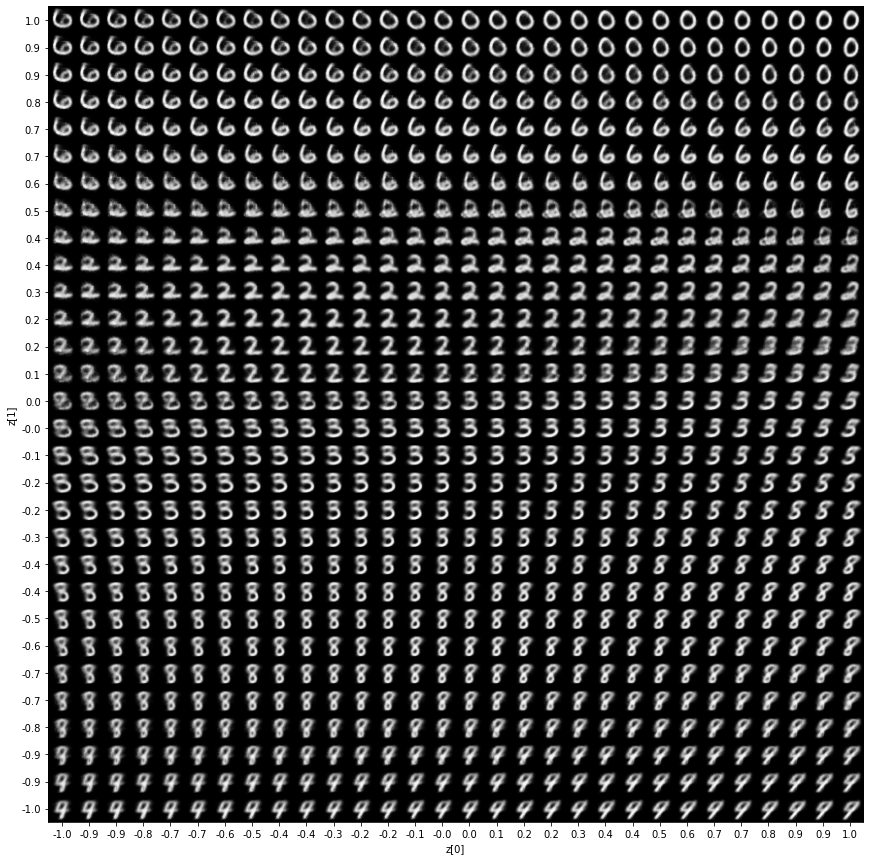

In [ ]:
plot_latent_space(vae3)

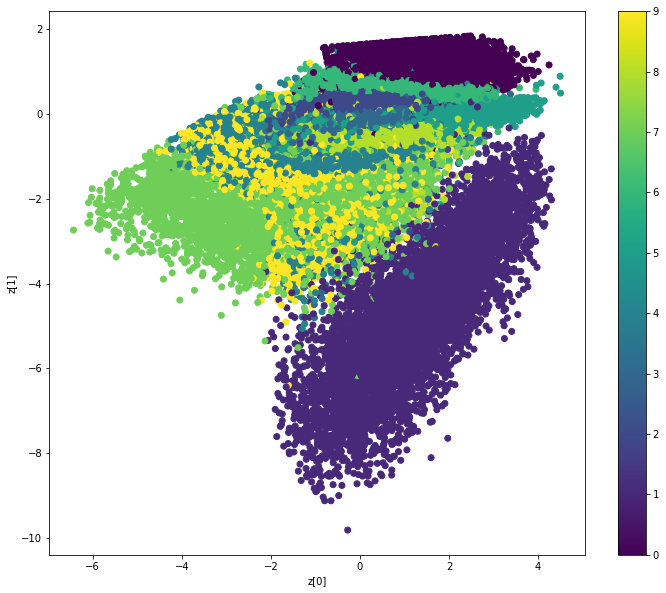

In [ ]:
plot_label_clusters(vae3, x_train, y_train)

Using more dimensions in latent space:

In [14]:
from model import *

filters = [32,64]
latent_dim = 10
image_size = (28,28)

In [15]:
encoder10 = Encoder(filters=filters,latent_dim=latent_dim)
encoder10.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 14, 14, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
conv_norm_1 (BatchNormalization (None, 14, 14, 32)   128         conv_layer_1[0][0]               
__________________________________________________________________________________________________
conv_relu_1 (ReLU)              (None, 14, 14, 32)   0           conv_norm_1[0][0]                
____________________________________________________________________________________________

In [16]:
decoder10 = Decoder(latent_dim=latent_dim,filters=filters,last_convdim=7)
decoder10.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
latent_input (InputLayer)    [(None, 10)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 3136)              34496     
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
deconv2d_1 (Conv2DTranspose) (None, 14, 14, 64)        36928     
_________________________________________________________________
deconv_norm_1 (BatchNormaliz (None, 14, 14, 64)        256       
_________________________________________________________________
deconv_relu_1 (ReLU)         (None, 14, 14, 64)        0         
_________________________________________________________________
deconv2d_2 (Conv2DTranspose) (None, 28, 28, 64)        3692

In [18]:
vae10 = VAE(encoder10,decoder10,beta=5.)
vae10.compile(optimizer=keras.optimizers.Adam())
vae10.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 228s 416ms/step - Total_loss: 217.7638 - Reconstruction_loss: 215.6835 - KL_loss: 0.4161
Epoch 2/10
547/547 [==============================] - 235s 429ms/step - Total_loss: 199.3146 - Reconstruction_loss: 194.5335 - KL_loss: 0.9562
Epoch 3/10
547/547 [==============================] - 209s 382ms/step - Total_loss: 195.2701 - Reconstruction_loss: 189.1943 - KL_loss: 1.2152
Epoch 4/10
547/547 [==============================] - 220s 402ms/step - Total_loss: 193.4352 - Reconstruction_loss: 186.6244 - KL_loss: 1.3622
Epoch 5/10
547/547 [==============================] - 218s 398ms/step - Total_loss: 191.9520 - Reconstruction_loss: 184.3603 - KL_loss: 1.5183
Epoch 6/10
547/547 [==============================] - 186s 339ms/step - Total_loss: 190.9145 - Reconstruction_loss: 182.7838 - KL_loss: 1.6261
Epoch 7/10
547/547 [==============================] - 174s 319ms/step - Total_loss: 189.8286 - Reconstruction_loss: 181.1868 - KL_loss: 1.7283

In [69]:
def generate_images(vae_model, image, lat_feature=0, scale=3., N=15): 
    """ image.shape = (batch, width, height, depth) = (1, 28, 28, 1)  """
    """ Encode image """
    z_mean,_,_ = vae_model.encoder.predict(image)
    """ Sample given feature """
    z_sample = z_mean.copy()
    grid_x = np.linspace(-scale, scale, N)
    samples = []
    for n in range(N):
        z_sample[0,lat_feature] = grid_x[n]
        samples.append(z_sample)
    samples = np.asarray(samples).reshape(N,latent_dim)
    """ Generate new images """
    dec_imgs = vae_model.decoder.predict(samples)
    """ Plot images """
    fig, axs = plt.subplots(nrows=1, ncols=16, figsize=(16, 1),
                            subplot_kw={'xticks': [], 'yticks': []})
    for i,ax in enumerate(axs.flat):
        if i==0: ax.imshow(mnist_digits[101])
        else: ax.imshow(dec_imgs[i-1,:,:,:])
    plt.tight_layout()
    plt.show()

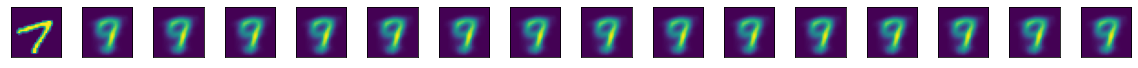

In [70]:
image = np.expand_dims(mnist_digits[101], 0)
vae_model = vae10
generate_images(vae_model=vae_model, image=image, lat_feature=0)

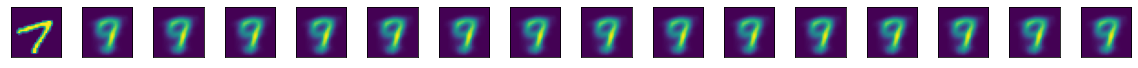

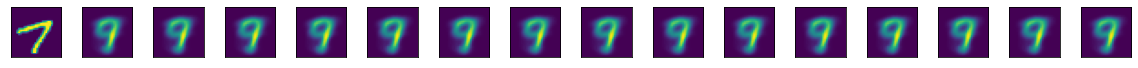

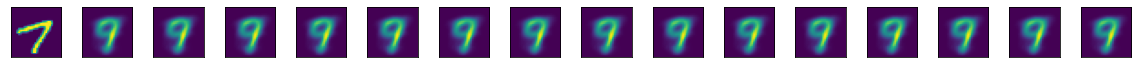

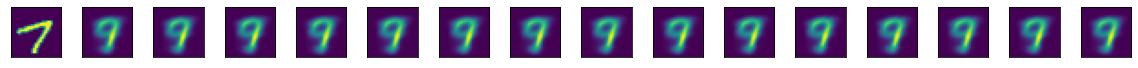

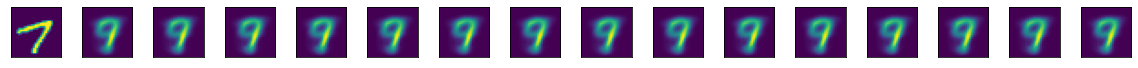

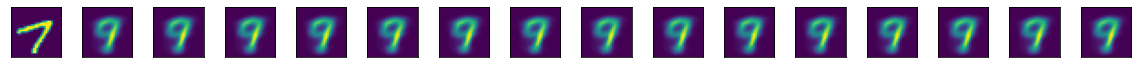

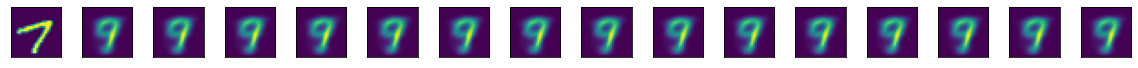

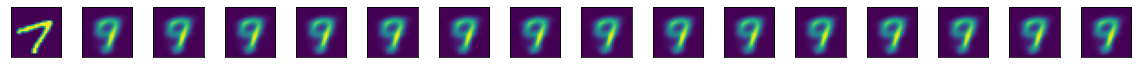

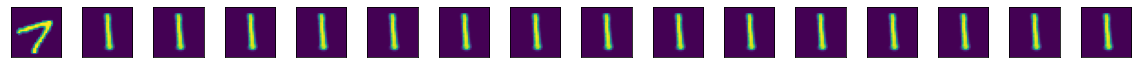

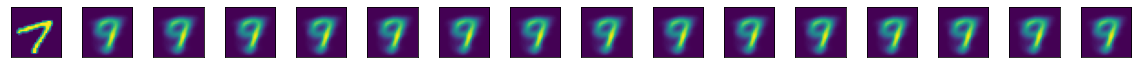

In [71]:
for i in range(10):
    generate_images(vae_model=vae_model, image=image, lat_feature=i)